##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Build a neural network that classifies images.
2. Train this neural network.
3. And, finally, evaluate the accuracy of the model.

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

Download and install the TensorFlow 2 package. Import TensorFlow into your program:

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:

In [15]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [18]:
import numpy as np
import matplotlib.pyplot as plt

0 : 5923
1 : 6742
2 : 5958
3 : 6131
4 : 5842
5 : 5421
6 : 5918
7 : 6265
8 : 5851
9 : 5949


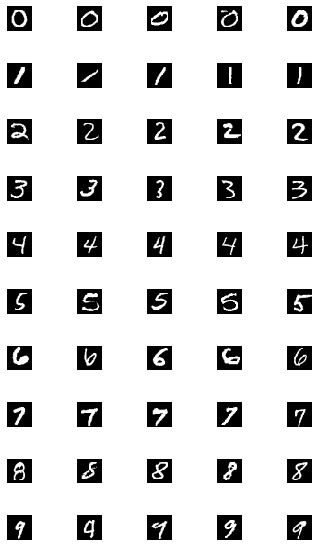

In [19]:
fig, axs = plt.subplots(nrows = 10, ncols= 5, figsize = (5,8))
fig.tight_layout()
for j in range(10):
    for i in range(5):
        axs[j][i].imshow(x_train[y_train==j][np.random.randint(0,len(x_train[y_train==j])-1),:,:], cmap ='gray')
        axs[j][i].axis('off')
    print(str(j) + ' : ' + str(len(x_train[y_train==j])))

Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train and evaluate the model:

In [20]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=0)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0252 - accuracy: 0.9911
Epoch 2/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0242 - accuracy: 0.9915
Epoch 3/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0234 - accuracy: 0.9917
Epoch 4/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0227 - accuracy: 0.9922
Epoch 5/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0231 - accuracy: 0.9923


[0.08703262941984613, 0.9804]

In [22]:
model.save('final_model.h5')

In [32]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
# load the image
    img = load_img(filename, color_mode='grayscale', target_size=(28, 28))
# convert to array
    img = img_to_array(img)
# reshape into a single sample with 1 channel
    img = img.reshape(28,28)
# prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

# load an image and predict the class
def run_example():
# load the image
    img = load_image('/home/shyam/Downloads/4.png')
# load model
    model = tf.keras.models.load_model('final_model.h5')
# predict the class
    digit = model.predict_classes(img)
    print(digit[0])

# entry point, run the example
run_example()

ValueError: Error when checking input: expected flatten_4_input to have 3 dimensions, but got array with shape (28, 28)

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).